### Section 1.1: Graph Basics

In this section, we will build a foundation for understanding Graph Convolutional Networks (GCNs) by covering essential graph concepts. These basics are critical for working with GCNs as they heavily depend on graph structures to function. We will go through the following key topics:

1. **Introduction to Graphs**  
2. **Types of Graphs**
3. **Graph Representations (Adjacency Matrix and Edge List)**
4. **Node and Edge Attributes**
5. **Graph Properties (e.g., Degree, Paths, Connectivity)**
6. **Implementing Basic Graph Structures in Python**

---



### 1. Introduction to Graphs

- **Definition**: A graph, denoted as \( G = (V, E) \), consists of:
  - **Nodes (or Vertices)** \( V \): These are individual entities in a graph, represented as points.
  - **Edges** \( E \): Connections or relationships between nodes, represented as lines connecting the points.
  
- **Example**:
  - Social networks are graphs where users are nodes, and friendships are edges.
  - A road network can be represented as a graph where intersections are nodes, and roads are edges.

- **Simple Code Representation**:


In [13]:
# Define the nodes (vertices) of the graph
# Each node represents a unique entity in the graph
nodes = ["A", "B", "C", "D"]

# Define the edges (connections) of the graph
# Each edge is a tuple connecting two nodes, indicating a relationship between them
edges = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")]

# Display the nodes and edges
print("Nodes:", nodes)  # This will print the list of all nodes in the graph
print("Edges:", edges)  # This will print all connections (edges) between the nodes


Nodes: ['A', 'B', 'C', 'D']
Edges: [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')]


In [22]:
print("The vertexes of the first edge in the edge list: "+ edges[0][0] + "  "+ edges[0][1]) # print the vertexes of firs edge in the list
print("The vertexes of the second edge in the edge list: "+ edges[1][0] + "  "+ edges[1][1]) # print the vertexes of second edge in the list

The vertexes of the first edge in the edge list: A  B
The vertexes of the second edge in the edge list: B  C


In [2]:

# Step-by-step: Printing each node separately for a clearer view
print("\nIndividual Nodes:")
for node in nodes:
    print(f"Node: {node}")  # Prints each node individually

# Step-by-step: Printing each edge separately for better understanding
print("\nIndividual Edges:")
for edge in edges:
    print(f"Edge from {edge[0]} to {edge[1]}")  # Displays each edge as a connection between two nodes



Individual Nodes:
Node: A
Node: B
Node: C
Node: D

Individual Edges:
Edge from A to B
Edge from B to C
Edge from C to D
Edge from D to A


In [25]:

# Additional: Display adjacency list for a better representation of the graph structure
# An adjacency list shows each node with the nodes it directly connects to
print("\nAdjacency List Representation:")
adjacency_list = {node: [] for node in nodes}  # Initialize adjacency list as a dictionary

print(adjacency_list)



Adjacency List Representation:
{'A': [], 'B': [], 'C': [], 'D': []}


There are a couple of alternative ways to write the code adjacency_list = {node: [] for node in nodes} while achieving the same result:

1. Using a for loop:

 ```
adjacency_list = {}  # Create an empty dictionary
for node in nodes:
    adjacency_list[node] = []  # Add each node as a key with an empty list as its value
```
This approach explicitly iterates through the nodes list and adds each node as a key to the adjacency_list dictionary, initializing its value with an empty list. It's more verbose but might be easier to understand for beginners.

2. Using the fromkeys method:

 ```
adjacency_list = dict.fromkeys(nodes, [])  # Create a dictionary with nodes as keys and empty lists as values
```
This method directly creates a dictionary from the nodes list, using each node as a key and assigning the provided value (in this case, an empty list []) to all keys. It's a more concise way to achieve the same result.

Choosing the best approach:

The original dictionary comprehension is generally preferred for its conciseness and readability, especially when you're familiar with comprehensions.
The for loop approach might be more beginner-friendly as it breaks down the logic step-by-step.
The fromkeys method is a concise option when you want to assign the same value to all keys.

In [24]:

# Populate the adjacency list based on edges
for edge in edges:
    adjacency_list[edge[0]].append(edge[1])  # Append the destination node to the source node's list

# Display the adjacency list
for node, neighbors in adjacency_list.items():
    print(f"{node}: {neighbors}")  # Shows each node followed by a list of nodes it connects to


A: ['B']
B: ['C']
C: ['D']
D: ['A']


Note: networksx library demonstrations are included in https://github.com/babupallam/Msc_AI_Module2_Natural_Language_Processing/tree/main/L10-Graph%20Convolutional%20Networks/Supporting_Documents/library_networkx

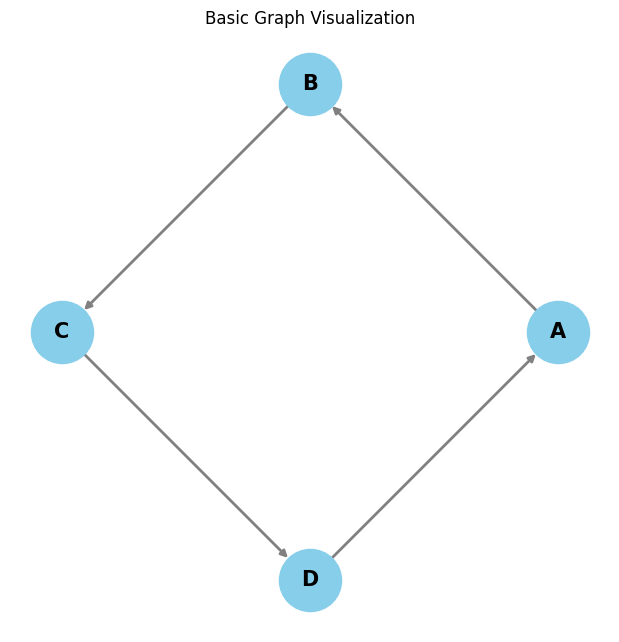

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes and edges
nodes = ["A", "B", "C", "D"]
edges = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")]

# Initialize a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph with a circular layout for visual clarity
plt.figure(figsize=(6, 6))  # Set figure size for better visibility
nx.draw_circular(
    G,
    with_labels=True,  # Show node labels
    node_size=2000,  # Size of each node
    node_color="skyblue",  # Color for nodes
    font_size=15,  # Font size for labels
    font_weight="bold",  # Bold font for better readability
    edge_color="gray",  # Color for edges
    width=2  # Thickness of edges
)

# Display the graph
plt.title("Basic Graph Visualization")
plt.show()



### 2. Types of Graphs

1. **Undirected vs. Directed Graphs**:
   - **Undirected Graphs**: Edges do not have a direction, meaning the relationship is mutual.
   - **Directed Graphs (Digraphs)**: Each edge has a direction, representing a one-way relationship.
   
   **Examples**:
   - **Undirected**: A Facebook friendship graph, where the connection is mutual.
   - **Directed**: A Twitter following graph, where the connection is one-way.



2. **Weighted vs. Unweighted Graphs**:
   - **Unweighted**: All edges are treated equally (no specific importance).
   - **Weighted**: Each edge has a weight, representing the strength or importance of the relationship.

   **Examples**:
   - **Unweighted**: A basic social network with no friend priority.
   - **Weighted**: A road network where weights represent distances between intersections.



3. **Graphs with Self-Loops**:
   - A graph can have edges where nodes connect to themselves, called **self-loops**.
   - **Example**: In a network of telephone calls, calling oneself is a self-loop.



4. **Complete Graphs**:
   - A graph is complete if there is an edge between every pair of nodes.



5. **Sparse vs. Dense Graphs**:
   - **Sparse**: Few edges relative to the number of possible edges.
   - **Dense**: Many edges relative to the number of possible edges.


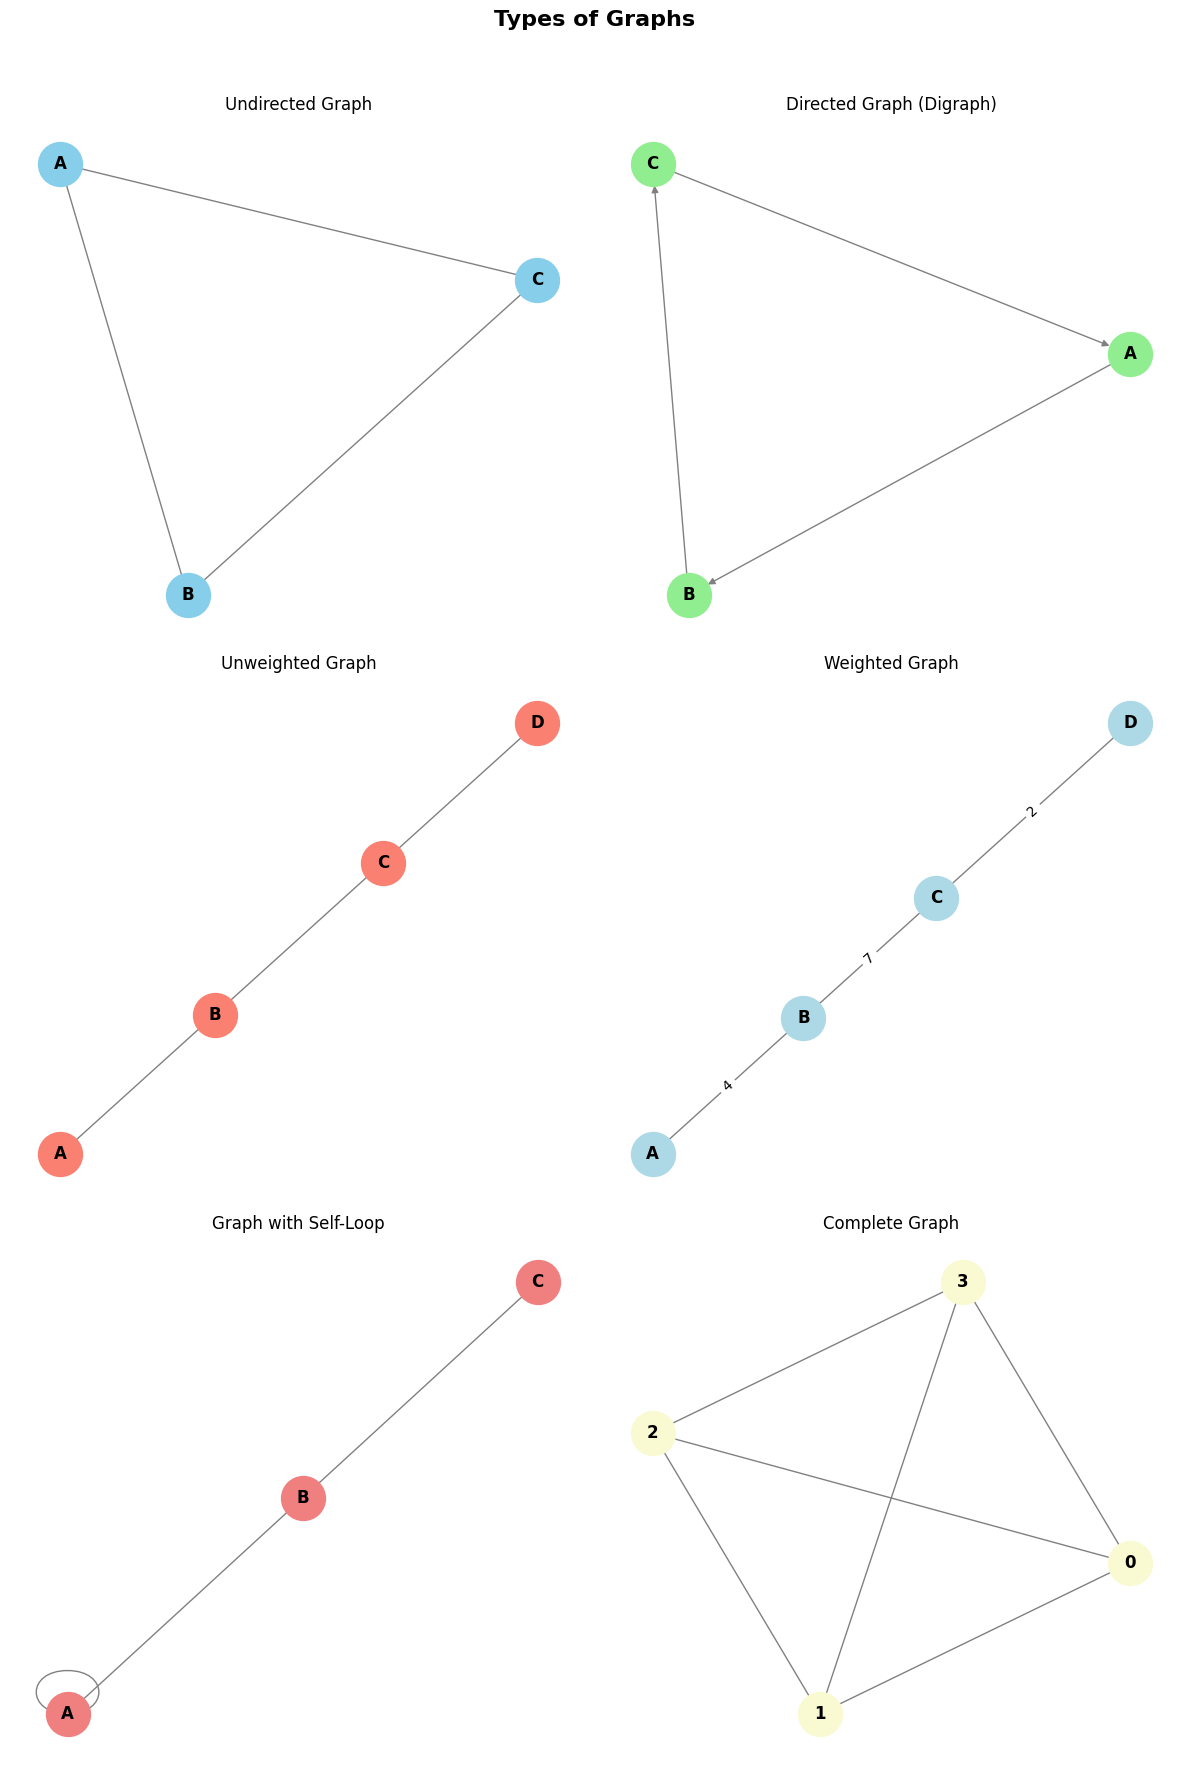

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create subplots for different graph types
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
fig.suptitle("Types of Graphs", fontsize=16, fontweight='bold')

# 1. Undirected Graph
G_undirected = nx.Graph()
G_undirected.add_edges_from([("A", "B"), ("B", "C"), ("C", "A")])
nx.draw(G_undirected, ax=axs[0, 0], with_labels=True, node_color="skyblue", edge_color="gray", node_size=1000, font_size=12, font_weight="bold")
axs[0, 0].set_title("Undirected Graph")

# 1. Directed Graph
G_directed = nx.DiGraph()
G_directed.add_edges_from([("A", "B"), ("B", "C"), ("C", "A")])
nx.draw(G_directed, ax=axs[0, 1], with_labels=True, node_color="lightgreen", edge_color="gray", node_size=1000, font_size=12, font_weight="bold", arrows=True)
axs[0, 1].set_title("Directed Graph (Digraph)")

# 2. Unweighted Graph
G_unweighted = nx.Graph()
G_unweighted.add_edges_from([("A", "B"), ("B", "C"), ("C", "D")])
nx.draw(G_unweighted, ax=axs[1, 0], with_labels=True, node_color="salmon", edge_color="gray", node_size=1000, font_size=12, font_weight="bold")
axs[1, 0].set_title("Unweighted Graph")

# 2. Weighted Graph
G_weighted = nx.Graph()
G_weighted.add_edge("A", "B", weight=4)
G_weighted.add_edge("B", "C", weight=7)
G_weighted.add_edge("C", "D", weight=2)
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, ax=axs[1, 1], with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels={(u, v): d['weight'] for u, v, d in G_weighted.edges(data=True)}, ax=axs[1, 1])
axs[1, 1].set_title("Weighted Graph")

# 3. Graph with Self-Loop
G_self_loop = nx.Graph()
G_self_loop.add_edges_from([("A", "A"), ("A", "B"), ("B", "C")])
nx.draw(G_self_loop, ax=axs[2, 0], with_labels=True, node_color="lightcoral", edge_color="gray", node_size=1000, font_size=12, font_weight="bold")
axs[2, 0].set_title("Graph with Self-Loop")

# 4. Complete Graph
G_complete = nx.complete_graph(4)
nx.draw(G_complete, ax=axs[2, 1], with_labels=True, node_color="lightgoldenrodyellow", edge_color="gray", node_size=1000, font_size=12, font_weight="bold")
axs[2, 1].set_title("Complete Graph")

# Display all graphs
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



### 3. Graph Representations

Graphs can be represented in various ways, each with its advantages and use cases. The two primary representations are the **Adjacency Matrix** and the **Edge List**.



#### 3.1 Adjacency Matrix

- **Definition**: A square matrix used to represent a graph. If there is an edge from node \(i\) to node \(j\), the matrix entry \(A_{ij}\) is 1; otherwise, it’s 0.
- **Properties**:
  - For an **undirected graph**, the adjacency matrix is **symmetric** (\(A_{ij} = A_{ji}\)).
  - For a **directed graph**, the matrix does not need to be symmetric.
  
- **Example**:
  - Suppose we have an undirected graph with nodes A, B, C, and edges (A-B), (B-C), (A-C):


Adjacency Matrix:
[0, 1, 1]
[1, 0, 1]
[1, 1, 0]


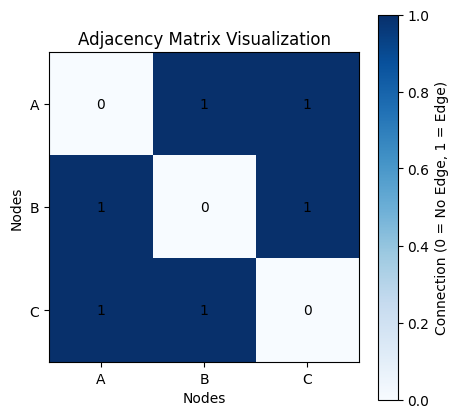

In [3]:
# Define the adjacency matrix for the graph
# Each row and column represents a node, and a value of 1 indicates an edge between nodes
adjacency_matrix = [
    [0, 1, 1],  # Node A connects to B and C
    [1, 0, 1],  # Node B connects to A and C
    [1, 1, 0]   # Node C connects to A and B
]

# Display the adjacency matrix in a readable format
print("Adjacency Matrix:")
for row in adjacency_matrix:
    print(row)  # Prints each row to represent the connections for each node

# Additional visualization for easier understanding using matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Convert adjacency matrix to numpy array for plotting
adj_matrix_np = np.array(adjacency_matrix)

# Create a plot for the adjacency matrix
plt.figure(figsize=(5, 5))
plt.imshow(adj_matrix_np, cmap="Blues", interpolation="nearest")

# Add labels and title for clarity
plt.title("Adjacency Matrix Visualization")
plt.xlabel("Nodes")
plt.ylabel("Nodes")

# Set x and y ticks to represent nodes
plt.xticks(range(len(adjacency_matrix)), ["A", "B", "C"])
plt.yticks(range(len(adjacency_matrix)), ["A", "B", "C"])

# Add values in cells for better interpretation
for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix[i])):
        plt.text(j, i, adjacency_matrix[i][j], ha="center", va="center", color="black")

# Show the adjacency matrix visualization
plt.colorbar(label="Connection (0 = No Edge, 1 = Edge)")
plt.show()


  - **Advantages**:
    - Simple to implement, especially for small graphs.
    - Suitable for quick lookup to check if two nodes are connected.
  - **Disadvantages**:
    - Memory-intensive for large, sparse graphs.



#### 3.2 Edge List

- **Definition**: A list of all edges, where each edge is represented as a tuple of connected nodes.
- **Properties**:
  - More memory-efficient for sparse graphs since it only stores the edges.
  
- **Example**:


In [7]:
# Edge list representation
edges = [("A", "B"), ("B", "C"), ("A", "C")]
print("Edge List:", edges)



Edge List: [('A', 'B'), ('B', 'C'), ('A', 'C')]


  - **Advantages**:
    - Efficient for storage with sparse graphs.
  - **Disadvantages**:
    - Checking connectivity between nodes can be slower compared to adjacency matrices.



#### 3.3 Choosing a Representation
- **Adjacency Matrix**: Preferred for dense graphs or when fast edge lookups are needed.
- **Edge List**: Preferred for sparse graphs where memory efficiency is prioritized.



### 4. Node and Edge Attributes

Graphs often have additional information, known as **attributes**, for nodes or edges.

1. **Node Attributes**:
   - Attributes provide specific information about each node.
   - Example: In a social network, nodes (users) may have attributes like age, location, or occupation.

2. **Edge Attributes**:
   - Attributes can also describe edges, adding more information to relationships.
   - Example: In a road network, edges (roads) may have attributes such as distance, speed limit, or toll cost.

- **Code Example**:


In [4]:
# Define nodes with attributes
nodes = {
    "A": {"age": 25, "location": "NY"},
    "B": {"age": 30, "location": "LA"}
}

# Define edges with attributes
edges = {
    ("A", "B"): {"distance": 300, "type": "highway"}
}
print("Nodes with Attributes:", nodes)
print("Edges with Attributes:", edges)


Nodes with Attributes: {'A': {'age': 25, 'location': 'NY'}, 'B': {'age': 30, 'location': 'LA'}}
Edges with Attributes: {('A', 'B'): {'distance': 300, 'type': 'highway'}}


Nodes with Attributes:
Node A - Attributes: {'age': 25, 'location': 'NY'}
Node B - Attributes: {'age': 30, 'location': 'LA'}

Edges with Attributes:
Edge ('A', 'B') - Attributes: {'distance': 300, 'type': 'highway'}


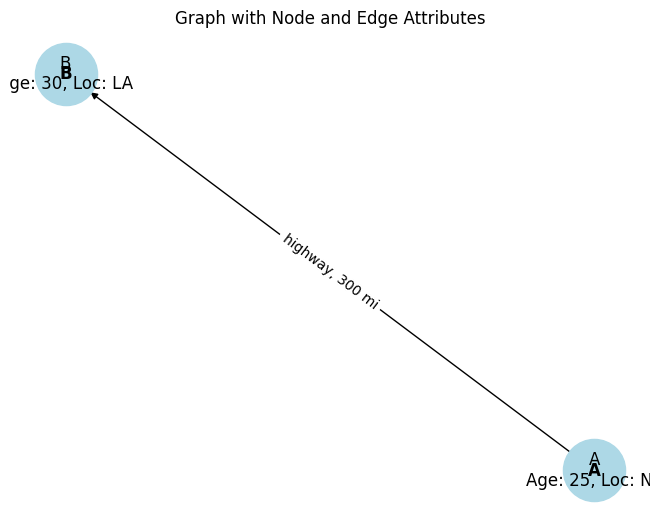

In [6]:
# Display nodes with their attributes
print("Nodes with Attributes:")
for node, attributes in nodes.items():
    print(f"Node {node} - Attributes: {attributes}")

# Display edges with their attributes
print("\nEdges with Attributes:")
for edge, attributes in edges.items():
    print(f"Edge {edge} - Attributes: {attributes}")

# Visualization with NetworkX and Matplotlib to show attributes
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
for node, attr in nodes.items():
    G.add_node(node, **attr)

# Add edges with attributes
for edge, attr in edges.items():
    G.add_edge(*edge, **attr)

# Set up layout for nodes
pos = nx.spring_layout(G)

# Draw the nodes with labels and size
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight="bold")

# Draw node attributes as labels
node_labels = {node: f"{node}\nAge: {attr['age']}, Loc: {attr['location']}" for node, attr in nodes.items()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Draw edge attributes as labels
edge_labels = {edge: f"{attr['type']}, {attr['distance']} mi" for edge, attr in edges.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph with node and edge attributes
plt.title("Graph with Node and Edge Attributes")
plt.show()



### 5. Graph Properties

1. **Degree of a Node**:
   - **Definition**: The number of edges connected to a node.
   - **Types**:
     - **In-degree**: For directed graphs, the count of incoming edges.
     - **Out-degree**: For directed graphs, the count of outgoing edges.

2. **Paths**:
   - A **path** is a sequence of edges connecting nodes.
   - **Example**: In a social network, a path from one person to another may represent how they are indirectly connected.

3. **Connectivity**:
   - **Connected Graph**: Every node is reachable from any other node.
   - **Disconnected Graph**: Some nodes are isolated from others.



### 6. Implementing Basic Graph Structures in Python

Python libraries like **NetworkX** provide powerful tools for handling graph data structures. However, understanding the underlying mechanics is beneficial, especially for implementing GCNs.



#### Code Implementation: Creating a Simple Graph


Using Python, here’s a basic implementation of a graph using dictionaries to store nodes and edges.



Graph Structure:
Node A has edges to: ['B', 'C']
Node B has edges to: ['C']
Node C has edges to: []


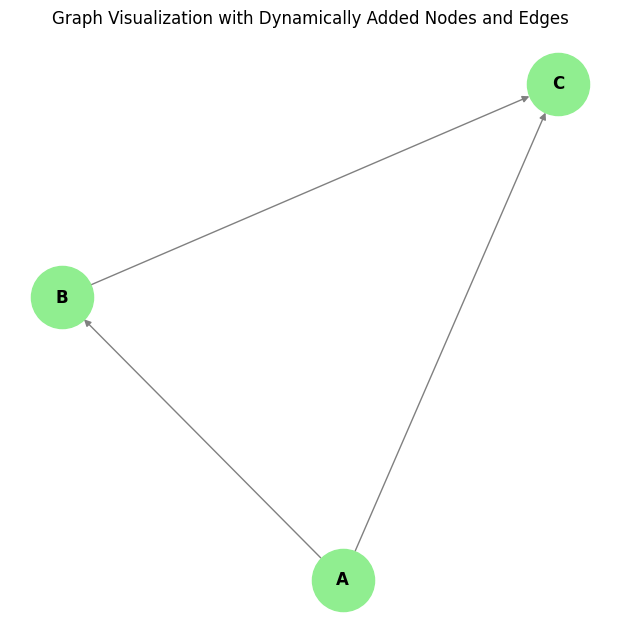

In [10]:
# Create an empty graph as a dictionary where each key is a node
# and each value is a list representing edges to other nodes
graph = {}

# Add nodes
graph["A"] = []  # Initialize node "A" with an empty list of edges
graph["B"] = []  # Initialize node "B"
graph["C"] = []  # Initialize node "C"

# Add edges
graph["A"].append("B")  # Create a directed edge from A to B
graph["B"].append("C")  # Create a directed edge from B to C
graph["A"].append("C")  # Create another edge from A to C

# Print the graph structure to show nodes and their connections
print("Graph Structure:")
for node, edges in graph.items():
    print(f"Node {node} has edges to: {edges}")

# Visualization with NetworkX and Matplotlib for better understanding
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph in NetworkX
G = nx.DiGraph()

# Add nodes and edges to the NetworkX graph
for node, edges in graph.items():
    G.add_node(node)  # Add each node
    for edge in edges:
        G.add_edge(node, edge)  # Add each edge

# Draw the graph with labels and a layout
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  # Position nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgreen", font_size=12, font_weight="bold", edge_color="gray")

# Show the graph structure visually
plt.title("Graph Visualization with Dynamically Added Nodes and Edges")
plt.show()



### Observations and Insights

- **Graph Complexity**: Graphs can vary significantly in complexity, from simple structures with a few nodes and edges to massive networks with millions of elements.
- **Choice of Representation**: Depending on the application, different graph representations have pros and cons. An adjacency matrix is easier to manipulate in matrix operations (like in GCNs), while an edge list can be more memory efficient.
- **Node Connectivity**: In GCNs, nodes exchange information with their neighbors, which is central to the message-passing framework. Understanding node degrees and connectivity will help in designing and interpreting GCNs.
- **Attribute Importance**: Node and edge attributes enrich the graph, allowing more complex analyses and features that GCNs can leverage for better representation learning.



### Key Takeaways

- A solid understanding of graph structures, representations, and properties is fundamental for using GCNs effectively.
- Choosing the right graph representation affects memory efficiency and computational performance.
- Node and edge attributes allow the GCN to model more detailed relationships, which is especially useful in applications like social networks, recommendation systems, and NLP tasks.

This overview sets a solid foundation for working with graphs and prepares you for the next steps, where you’ll build upon this knowledge to implement GCN layers and apply them to real-world tasks.